In [ ]:
print("NAME:- RAMESH BHUTKA")
print("SAP ID:- 5300419003")

In [ ]:
import datetime
print(datetime.datetime.now())

# practical-8

Implementation of convolutional neural network to predict numbers from number images

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="practical-8")

**Dataset description**

MNIST ("Modified National Institute of Standards and Technology") 

The data set used here is MNIST dataset. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits (0 to 9). The database contains 60,000 training images and 10,000 testing images each of size 28x28. The first step is to load the dataset, which can be easily done through the keras api.

In [ ]:
import tensorflow as tf # tensorflow 2.0
from keras.datasets import mnist
import numpy as np
import keras
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

In [ ]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten 
from keras.layers import MaxPooling2D, Dropout
model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 107s 56ms/step - loss: 0.2672 - accuracy: 0.9165 - val_loss: 0.0280 - val_accuracy: 0.9908
Epoch 2/3
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0438 - accuracy: 0.9874 - val_loss: 0.0304 - val_accuracy: 0.9920
Epoch 3/3
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0348 - val_accuracy: 0.9888


In [ ]:
# evaluate the model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.0348 - accuracy: 0.9888

Test loss: 0.034810978919267654
Test accuracy: 0.9887999892234802


Predicted number is:  9


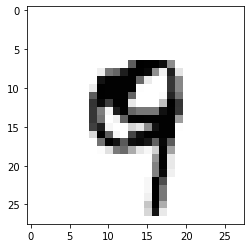

In [ ]:
# prediction
from matplotlib import pyplot as plt
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted number is: ",pred.argmax())


Predicted number is:  2


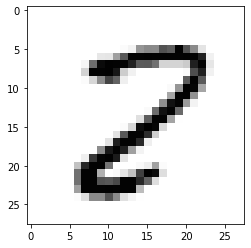

In [ ]:
# prediction
from matplotlib import pyplot as plt
image_index = 444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted number is: ",pred.argmax())


Predicted number is:  3


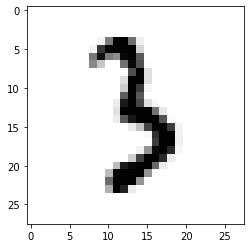

In [ ]:
# prediction
from matplotlib import pyplot as plt
image_index = 44
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted number is: ",pred.argmax())


In [ ]:
jovian.commit(project="practical-8")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-8


'https://jovian.ai/rameshbhutka11/practical-8'